In [1]:
from presc.spatial_distribution.categorical_distance import SpatialDistribution 

In [2]:
# TOOD: how to share state between notebooks

%run setup_report.py

In [3]:
label_predicted = cm._test_preds
label_true = cm._dataset.test_labels
data = pd.DataFrame(cm.dataset.test_features)


In [4]:
spatd = SpatialDistribution(data,label_predicted,label_true)

## First let's start by exploring what's the average separation of every point to every other and see if misclassified points show an evident pattern

## Which metrics can we use

In [5]:
spatd.get_available_metrics()

Categorical Metrics
overlap
goodall2
goodall3
lin
Numeric Metrics
l2_norm
l1_norm


100%|████████████████████████████████████████████████████| 1470/1470 [00:02<00:00, 549.15it/s]
C:\Users\castromi\.conda\envs\presc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


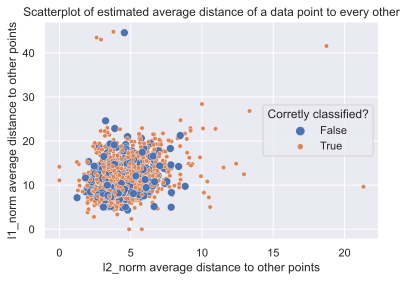

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Scatterplot of estimated average distance of a data point to every other'}, xlabel='l2_norm average distance to other points', ylabel='l1_norm average distance to other points'>)

In [6]:
spatd.plot_distance_scatterplot('l2_norm','l1_norm',scatter_sample=1)


# We can marginalize and see only the estimated separation of misclassified points to the rest of the data

100%|███████████████████████████████████████████████████████| 355/355 [00:04<00:00, 72.94it/s]
C:\Users\castromi\.conda\envs\presc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


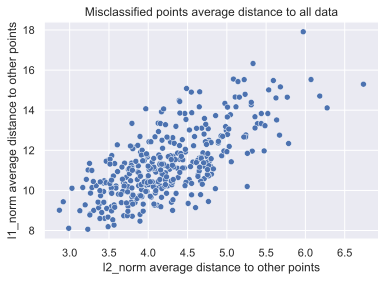

In [7]:
_,_,dist1,dist2=spatd.plot_distance_misclassified('l2_norm','l1_norm', distance_sample=0.01,scatter_sample=1)

## We can take one of the metrics in either of the axis and visualize the distribution in a histogram

  2%|▉                                                     | 19/1115 [00:00<00:05, 186.76it/s]

Processing correctly classified datapoints in metric  l1_norm


  2%|█                                                        | 7/355 [00:00<00:12, 28.29it/s]

Processing misclasfied datapoints in metric  l1_norm


100%|███████████████████████████████████████████████████████| 355/355 [00:11<00:00, 30.96it/s]


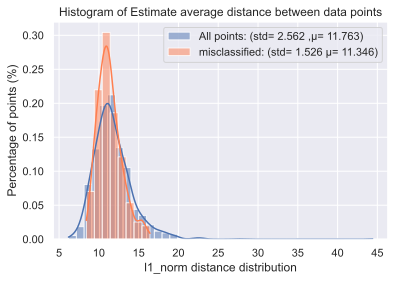

In [8]:
spatd.plot_avg_distance_histogram('l1_norm',bar_width=1,histo_sample=1)

# Now say we are interesting in analysing one particular point with respect to every other instead of every point distance to the data in general

In [9]:
dpoint = spatd.get_datapoint(1)  # let's get the first one
print(dpoint)


fixed acidity             7.0000
volatile acidity          0.3100
citric acid               0.2600
residual sugar            7.4000
chlorides                 0.0690
free sulfur dioxide      28.0000
total sulfur dioxide    160.0000
density                   0.9954
pH                        3.1300
sulphates                 0.4600
alcohol                   9.8000
Name: 42, dtype: float64


# Let's plot the distribution of the distances from that point to every other point  that has been corrently classified and every point that has been misclasified

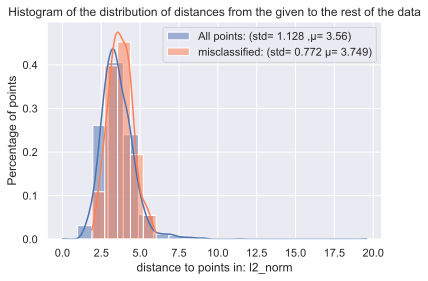

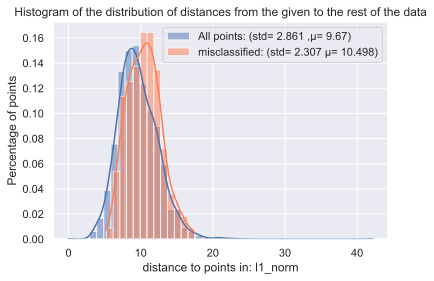

In [10]:
spatd.plot_distance_to_point_histogram(dpoint,"l2_norm",bar_width=1)
spatd.plot_distance_to_point_histogram(dpoint,"l1_norm",bar_width=1)